In [1]:
import numpy as np 
import os 
import random
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


(1, 1210, 2151, 3)
(1, 1210, 2151, 3)
(1, 1210, 2151, 3)
(1, 1210, 2151, 3)
(1, 1210, 2151, 3)
(1, 1210, 2151, 3)


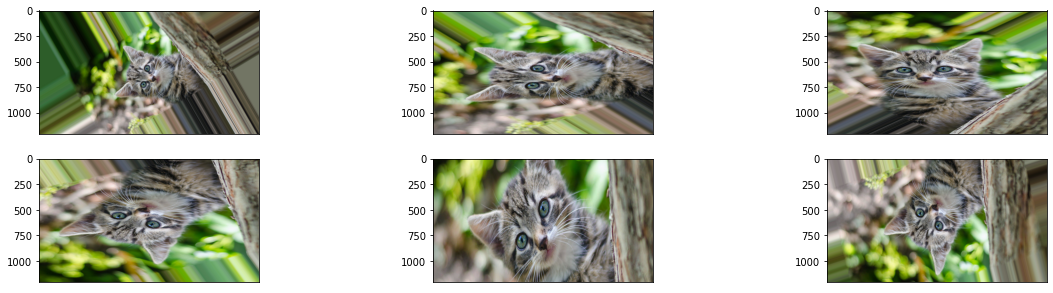

In [3]:
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

img=load_img('/content/drive/MyDrive/Deep_Learn/kedi.jpg')

data=img_to_array(img)
samples=expand_dims(data,0)

datagen=ImageDataGenerator(rotation_range=45,
                           vertical_flip=True,
                           zoom_range=0.5)
it=datagen.flow(samples,batch_size=1)
plt.figure(figsize=(20,5))

for i in range(6):
  batch=it.next()
  plt.subplot(2,3,i+1)
  print(batch.shape)
  image=batch[0].astype('uint8')
  plt.xticks([])
  plt.imshow(image)
plt.show()

Found 6598 images belonging to 196 classes.
Found 1546 images belonging to 196 classes.
Found 8056 images belonging to 196 classes.
{'AM General Hummer SUV 2000': 0, 'Acura Integra Type R 2001': 1, 'Acura RL Sedan 2012': 2, 'Acura TL Sedan 2012': 3, 'Acura TL Type-S 2008': 4, 'Acura TSX Sedan 2012': 5, 'Acura ZDX Hatchback 2012': 6, 'Aston Martin V8 Vantage Convertible 2012': 7, 'Aston Martin V8 Vantage Coupe 2012': 8, 'Aston Martin Virage Convertible 2012': 9, 'Aston Martin Virage Coupe 2012': 10, 'Audi 100 Sedan 1994': 11, 'Audi 100 Wagon 1994': 12, 'Audi A5 Coupe 2012': 13, 'Audi R8 Coupe 2012': 14, 'Audi RS 4 Convertible 2008': 15, 'Audi S4 Sedan 2007': 16, 'Audi S4 Sedan 2012': 17, 'Audi S5 Convertible 2012': 18, 'Audi S5 Coupe 2012': 19, 'Audi S6 Sedan 2011': 20, 'Audi TT Hatchback 2011': 21, 'Audi TT RS Coupe 2012': 22, 'Audi TTS Coupe 2012': 23, 'Audi V8 Sedan 1994': 24, 'BMW 1 Series Convertible 2012': 25, 'BMW 1 Series Coupe 2012': 26, 'BMW 3 Series Sedan 2012': 27, 'BMW 3 Se

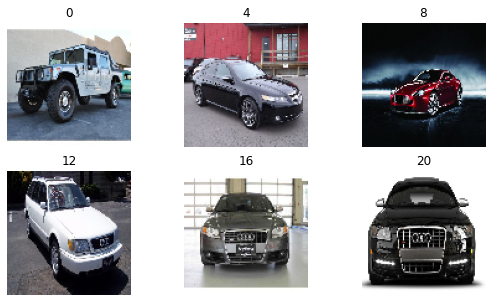

In [6]:
train_path='/content/drive/MyDrive/Deep_Learn/Car Dataset/train'
test_path='/content/drive/MyDrive/Deep_Learn/Car Dataset/test'

##veri train validation test

train_datagen=ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

val_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(100,100),
    shuffle=True,
    class_mode='categorical',
    batch_size=32,
    subset='training'
)

val_generator=val_datagen.flow_from_directory(
    train_path,
    target_size=(100,100),
    shuffle=False,
    class_mode='categorical',
    batch_size=32,
    subset='validation'
)

test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(100,100),
    shuffle=True,
    class_mode='categorical',
    batch_size=1,
    
)

print(train_generator.class_indices)
print(test_generator.classes)

plt.figure(figsize=(9,5))
for i in range(6):
  img,y=val_generator.next()
  plt.subplot(2,3,i+1)
  plt.axis('off')
  plt.title(list(y[:195][0]).index(1))
  plt.imshow(img[0])



In [7]:
model=Sequential()
model.add(Flatten(input_shape=(100,100,3)))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(196,activation='softmax'))
model.compile(loss="categorical_crossentropy",optimizer="Adam",metrics=['accuracy'])
model.summary()

history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//8,
    validation_data=val_generator,
    epochs=5,
    validation_steps=val_generator.samples//8
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               15360512  
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 196)               100548    
Total params: 15,723,716
Trainable params: 15,723,716
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
 55/824 [=>............................] - ETA: 1:28:47 - loss: 8.9491 - accuracy: 0.0029

KeyboardInterrupt: ignored